In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import csv files

AC_Power = pd.read_csv("../data/Data_9068/9068_ac_power_data_20240101_20250430.csv")
Irradiance = pd.read_csv("../data/Data_9068/9068_irradiance_data_20240101_20250430.csv")
Weather = pd.read_csv("../data/NREL_Weather/1000190_40.38_-104.55_2024.csv",header=2)

In [13]:
AC_Power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137249 entries, 0 to 137248
Data columns (total 13 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   measured_on                                   137249 non-null  object 
 1   inverter_module_1.1_ac_power_(kw)_inv_150135  137166 non-null  float64
 2   inverter_module_1.2_ac_power_(kw)_inv_150136  137166 non-null  float64
 3   inverter_module_1.3_ac_power_(kw)_inv_150137  137166 non-null  float64
 4   inverter_module_1.4_ac_power_(kw)_inv_150138  137166 non-null  float64
 5   inverter_module_2.1_ac_power_(kw)_inv_150139  135874 non-null  float64
 6   inverter_module_2.2_ac_power_(kw)_inv_150140  135874 non-null  float64
 7   inverter_module_2.3_ac_power_(kw)_inv_150141  135874 non-null  float64
 8   inverter_module_2.4_ac_power_(kw)_inv_150142  135874 non-null  float64
 9   inverter_1_ac_power_(kw)_inv_150143           13

In [14]:
Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Year                   105120 non-null  int64  
 1   Month                  105120 non-null  int64  
 2   Day                    105120 non-null  int64  
 3   Hour                   105120 non-null  int64  
 4   Minute                 105120 non-null  int64  
 5   Temperature            105120 non-null  float64
 6   Alpha                  105120 non-null  float64
 7   Aerosol Optical Depth  105120 non-null  float64
 8   Asymmetry              105120 non-null  float64
 9   Clearsky DHI           105120 non-null  int64  
 10  Clearsky DNI           105120 non-null  int64  
 11  Clearsky GHI           105120 non-null  int64  
 12  Cloud Fill Flag        105120 non-null  int64  
 13  Cloud Type             105120 non-null  int64  
 14  Dew Point              105120 non-nu

In [ ]:
#Restrict 9068 site data to 2024 and convert time to pandas Timestamp
AC_Power["measured_on"] = pd.to_datetime(AC_Power["measured_on"])
AC_Power = AC_Power[AC_Power["measured_on"].dt.year ==  2024]

Irradiance["measured_on"] = pd.to_datetime(Irradiance["measured_on"])
Irradiance = Irradiance[Irradiance["measured_on"].dt.year ==  2024]

In [26]:
AC_Power.sample(3)

measured_on  inverter_module_1.1_ac_power_(kw)_inv_150135  \
89615 2024-11-14 23:20:00                                           0.0   
14406 2024-02-20 00:35:00                                           0.0   
18480 2024-03-05 04:05:00                                           0.0   

       inverter_module_1.2_ac_power_(kw)_inv_150136  \
89615                                           0.0   
14406                                           0.0   
18480                                           0.0   

       inverter_module_1.3_ac_power_(kw)_inv_150137  \
89615                                           0.0   
14406                                           0.0   
18480                                           0.0   

       inverter_module_1.4_ac_power_(kw)_inv_150138  \
89615                                           0.0   
14406                                           0.0   
18480                                           0.0   

       inverter_module_2.1_ac_power_(kw)_inv_150139  \
89615                                           0.0   
14406                                           0.0   
18480                                           0.0   

       inverter_module_2.2_ac_power_(kw)_inv_150140  \
89615                                           0.0   
14406                                           0.0   
18480                                           0.0   

       inverter_module_2.3_ac_power_(kw)_inv_150141  \
89615                                           0.0   
14406                                           0.0   
18480                                           0.0   

       inverter_module_2.4_ac_power_(kw)_inv_150142  \
89615                                           0.0   
14406                                           0.0   
18480                                           0.0   

       inverter_1_ac_power_(kw)_inv_150143  \
89615                                  0.0   
14406                                  0.0   
18480                                  0.0   

       inverter_2_ac_power_(kw)_inv_150144  \
89615                                  0.0   
14406                                  0.0   
18480                                  0.0   

       inverter_1_power_factor_inv_150145  inverter_2_power_factor_inv_150146  \
89615                                 0.0                                0.00   
14406                                 0.0                                0.00   
18480                                 0.0                               -0.14   

       Power  
89615    0.0  
14406    0.0  
18480    0.0

In [ ]:
#Create/merge weather time columns into pandas Timestamp
Weather["DateTime"] = pd.to_datetime(Weather[["Year","Month","Day","Hour","Minute"]])
Weather.drop(columns=["Year","Month","Day","Hour","Minute"], inplace = True)

In [25]:
Weather.sample(3)

Temperature  Alpha  Aerosol Optical Depth  Asymmetry  Clearsky DHI  \
56298          36.1   1.83                  0.138       0.62           131   
102354         11.7   1.36                  0.019       0.62            46   
50416          21.3   1.60                  0.065       0.61             0   

        Clearsky DNI  Clearsky GHI  Cloud Fill Flag  Cloud Type  Dew Point  \
56298            886           962                0           3        8.4   
102354           854           304                0           7       -6.5   
50416              0             0                0           1        9.8   

        ...  Ozone  Relative Humidity  Solar Zenith Angle   SSA  \
56298   ...  0.292              18.40               20.37  0.94   
102354  ...  0.269              27.45               72.37  0.90   
50416   ...  0.314              47.93              113.65  0.92   

        Surface Albedo  Pressure  Precipitable Water  Wind Direction  \
56298             0.20       855                 2.7              24   
102354            0.22       853                 0.7             297   
50416             0.21       853                 2.0             265   

        Wind Speed            DateTime  
56298          3.9 2024-07-15 11:30:00  
102354         3.4 2024-12-22 09:30:00  
50416          1.6 2024-06-25 01:20:00  

[3 rows x 24 columns]

In [5]:
#Combine inverter power output readings and remove other columns and missing data
AC_Power["Power"] = AC_Power[["inverter_1_ac_power_(kw)_inv_150143","inverter_2_ac_power_(kw)_inv_150144"]].sum(axis=1)
AC_Power.dropna(inplace=True)
Power = AC_Power.drop(columns=AC_Power.columns[1:-1])
Power.sample(3)

measured_on  Power
78942 2024-10-08 19:35:00    0.0
61081 2024-08-06 01:30:00    0.0
86148 2024-11-02 22:25:00    0.0

In [6]:
#Merge into one dataframe based on matching timestamps
#Any missing times in at least one data (e.g. 2024-02-29 in Weather) are removed
Merged_data = pd.merge(Power,Irradiance,left_on="measured_on",right_on="measured_on",how="inner")
Merged_data = pd.merge(Merged_data,Weather,left_on="measured_on",right_on="DateTime",how="inner")
Merged_data.drop(columns=["measured_on"],inplace=True)

In [23]:
Merged_data.sample(3)

Power  pyranometer_(class_a)_pad_1_poa_irradiance_(w/m2)_o_149723  \
46278  3312.0                                             883.55            
91599   389.0                                             164.58            
7501      0.0                                              -1.30            

       pyranometer_(class_a)_pad_1_poa_irradiance_temp_compensated_(w/m2)_o_149724  \
46278                                             883.56                             
91599                                             164.23                             
7501                                               -1.32                             

       pyranometer_(class_a)_pad_2_poa_irradiance_(w/m2)_o_149725  \
46278                                             868.94            
91599                                             112.62            
7501                                               -1.43            

       pyranometer_(class_a)_pad_2_poa_irradiance_temp_compensated_(w/m2)_o_149726  \
46278                                             868.98                             
91599                                             112.95                             
7501                                               -1.44                             

       Temperature  Alpha  Aerosol Optical Depth  Asymmetry  Clearsky DHI  \
46278         26.8   1.24                  0.064       0.61            81   
91599          2.6   1.57                  0.018       0.61            35   
7501          -2.4   1.30                  0.020       0.62             0   

       ...  Ozone  Relative Humidity  Solar Zenith Angle   SSA  \
46278  ...  0.323              25.63               51.51  0.91   
91599  ...  0.308              43.36               79.18  0.91   
7501   ...  0.353              59.37              136.84  0.92   

       Surface Albedo  Pressure  Precipitable Water  Wind Direction  \
46278            0.21       849                 1.5              55   
91599            0.22       855                 0.5             340   
7501             0.21       862                 0.6             294   

       Wind Speed            DateTime  
46278         3.7 2024-06-16 08:05:00  
91599         2.9 2024-11-27 15:20:00  
7501          2.3 2024-01-27 03:05:00  

[3 rows x 29 columns]

In [ ]:
#Dataframe of hourly data for each day
Merged_data_cleared = Merged_data.drop(columns=["Fill Flag", "Cloud Fill Flag"])

aggregation = {col: "mean" for col in Merged_data_cleared.columns[:-1]}
aggregation.update({"Precipitable Water" : "sum", "Power": "sum", "Cloud Type":lambda x: x.mode().iloc[0] if not x.mode().empty else None})

Merged_Hourly = Merged_data_cleared.resample("h", on="DateTime").agg(aggregation)
Merged_Hourly.dropna(inplace = True)

#Exclude hours with no power generated
Merged_Hourly_Power = Merged_Hourly[Merged_Hourly["Power"]>0]

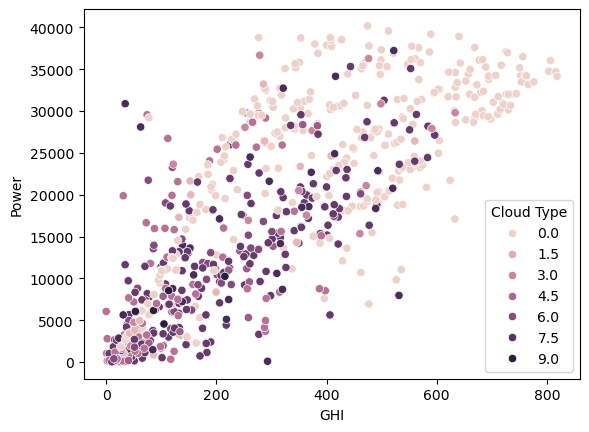

In [368]:
sns.scatterplot(Merged_Hourly_Power.iloc[0:30*24],x="GHI",y="Power",hue="Cloud Type")
plt.show()

In [265]:
Merged_Hourly_Power.sample(3)

Power  \
DateTime                       
2024-09-24 09:00:00  36899.0   
2024-11-16 15:00:00   2097.0   
2024-07-15 18:00:00  17359.0   

                     pyranometer_(class_a)_pad_1_poa_irradiance_(w/m2)_o_149723  \
DateTime                                                                          
2024-09-24 09:00:00                                         833.316667            
2024-11-16 15:00:00                                          70.657500            
2024-07-15 18:00:00                                           0.000000            

                     pyranometer_(class_a)_pad_1_poa_irradiance_temp_compensated_(w/m2)_o_149724  \
DateTime                                                                                           
2024-09-24 09:00:00                                         833.386667                             
2024-11-16 15:00:00                                          70.772500                             
2024-07-15 18:00:00                                           0.000000                             

                     pyranometer_(class_a)_pad_2_poa_irradiance_(w/m2)_o_149725  \
DateTime                                                                          
2024-09-24 09:00:00                                         823.884167            
2024-11-16 15:00:00                                          68.996667            
2024-07-15 18:00:00                                         412.626667            

                     pyranometer_(class_a)_pad_2_poa_irradiance_temp_compensated_(w/m2)_o_149726  \
DateTime                                                                                           
2024-09-24 09:00:00                                         824.035000                             
2024-11-16 15:00:00                                          69.034167                             
2024-07-15 18:00:00                                         413.908333                             

                     Temperature     Alpha  Aerosol Optical Depth  Asymmetry  \
DateTime                                                                       
2024-09-24 09:00:00    21.750000  1.445833               0.044167       0.62   
2024-11-16 15:00:00    10.050000  1.299167               0.041917       0.61   
2024-07-15 18:00:00    24.091667  1.685833               0.264083       0.62   

                     Clearsky DHI  ...         GHI     Ozone  \
DateTime                           ...                         
2024-09-24 09:00:00     72.916667  ...  623.916667  0.274917   
2024-11-16 15:00:00     41.916667  ...  115.000000  0.287333   
2024-07-15 18:00:00     59.250000  ...  102.416667  0.293000   

                     Relative Humidity  Solar Zenith Angle       SSA  \
DateTime                                                               
2024-09-24 09:00:00          32.681667           52.503333  0.910000   
2024-11-16 15:00:00          33.117500           79.004167  0.934167   
2024-07-15 18:00:00          44.253333           80.472500  0.961667   

                     Surface Albedo    Pressure  Precipitable Water  \
DateTime                                                              
2024-09-24 09:00:00            0.21  858.000000                22.8   
2024-11-16 15:00:00            0.22  845.416667                 8.4   
2024-07-15 18:00:00            0.20  856.000000                37.8   

                     Wind Direction  Wind Speed  
DateTime                                         
2024-09-24 09:00:00      342.916667    2.016667  
2024-11-16 15:00:00      122.000000    1.383333  
2024-07-15 18:00:00      121.500000    2.833333  

[3 rows x 26 columns]

In [ ]:
#Dataframe of daily data
Merged_Daily = Merged_data_cleared.resample("d", on="DateTime").agg(aggregation)
Merged_Daily.dropna(inplace = True)

[]

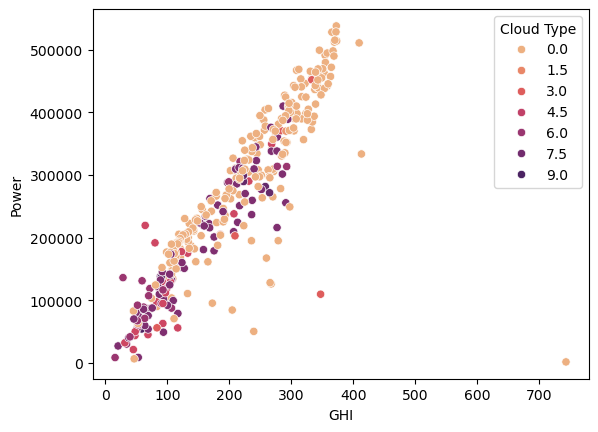

In [ ]:
sns.scatterplot(Merged_Daily,x="GHI",y="Power",hue="Cloud Type",palette=sns.color_palette("flare", as_cmap=True))
plt.plot()

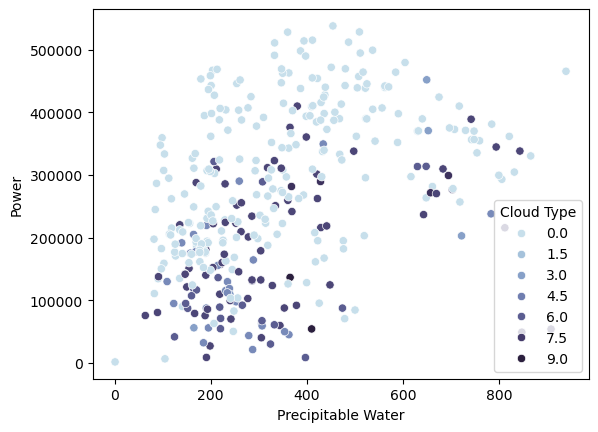

In [ ]:
sns.scatterplot(Merged_Daily,x="Precipitable Water",y="Power",hue="Cloud Type",palette=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True))
plt.show()

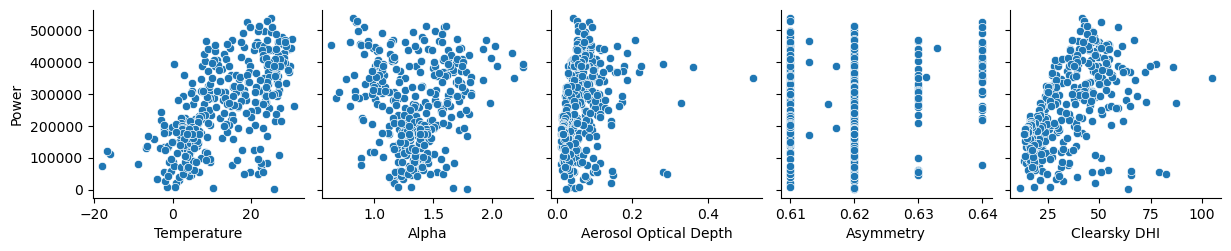

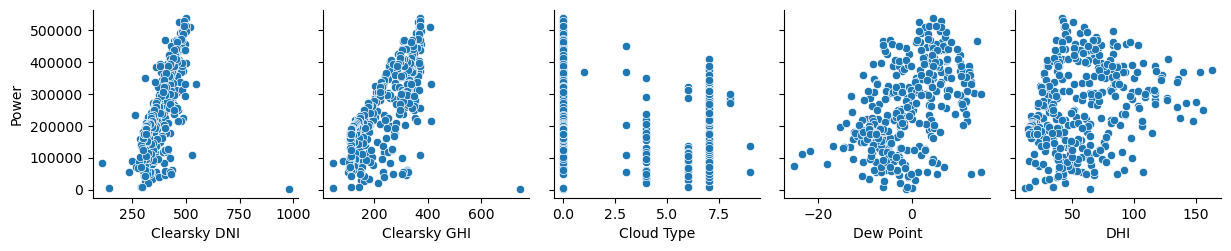

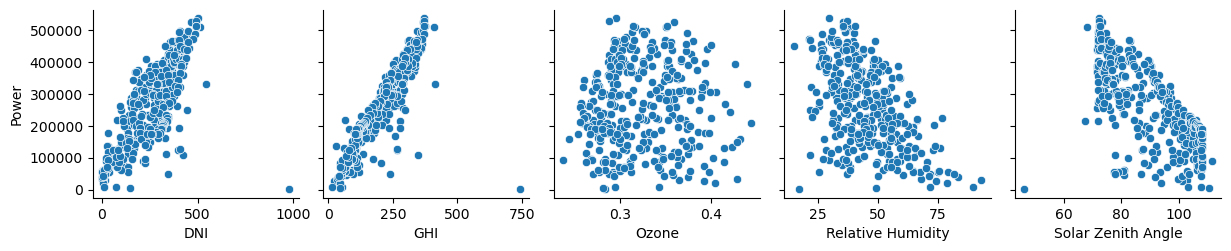

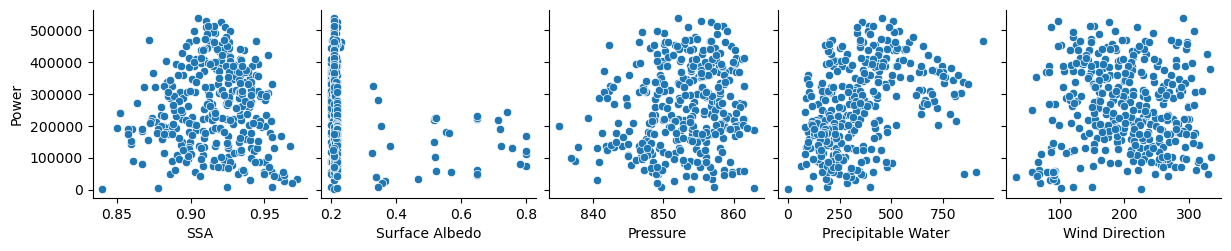

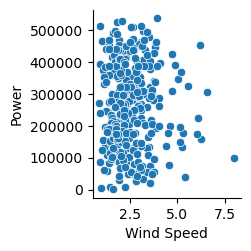

In [ ]:
#Graph daily power against all other features
for i in range (1,6):
    features = Merged_Daily.columns[5*i:5*(i+1)].tolist()
    sns.pairplot(Merged_Daily, x_vars=features, y_vars="Power")
plt.show()

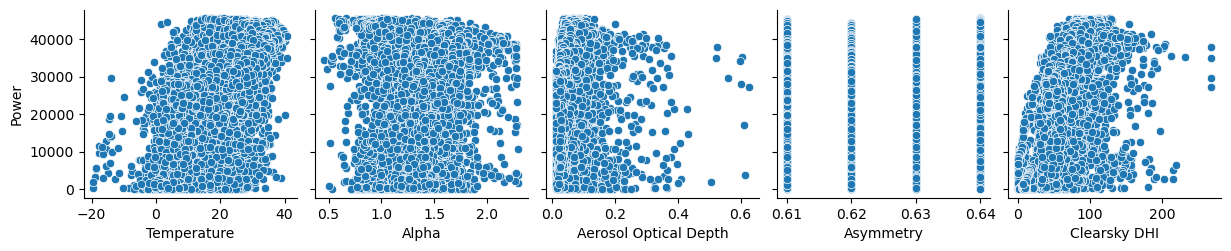

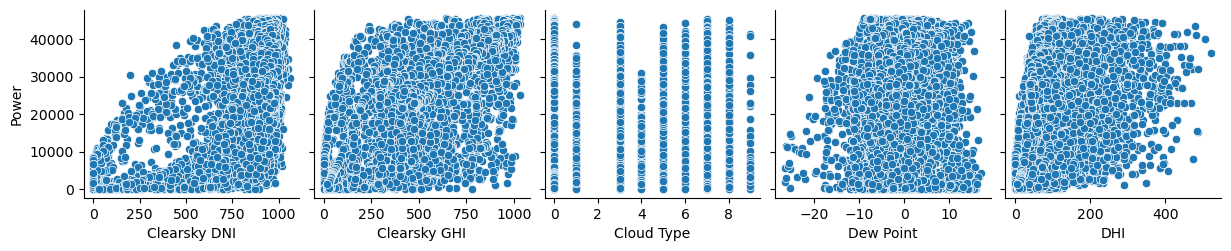

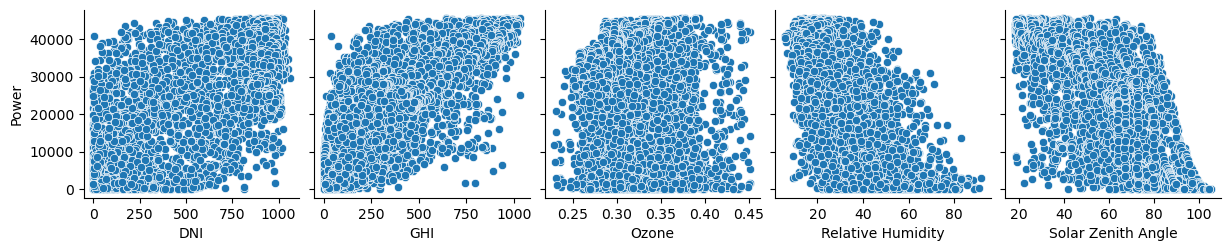

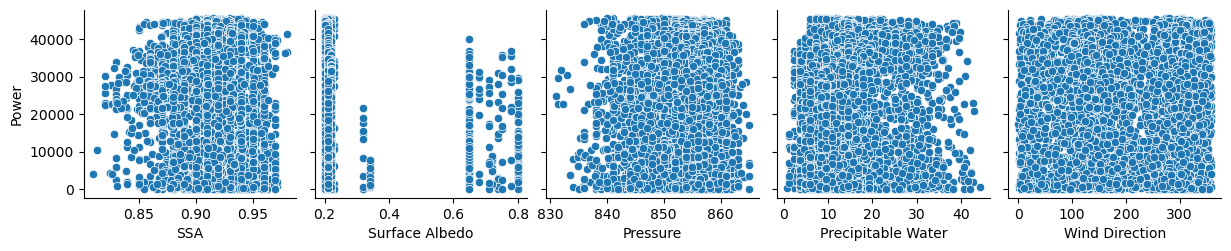

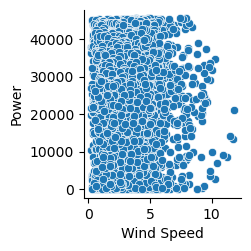

In [ ]:
#Graph hourly power against all other features
for i in range (1,6):
    features = Merged_Hourly_Power.columns[5*i:5*(i+1)].tolist()
    sns.pairplot(Merged_Hourly_Power, x_vars=features, y_vars="Power")
plt.show()

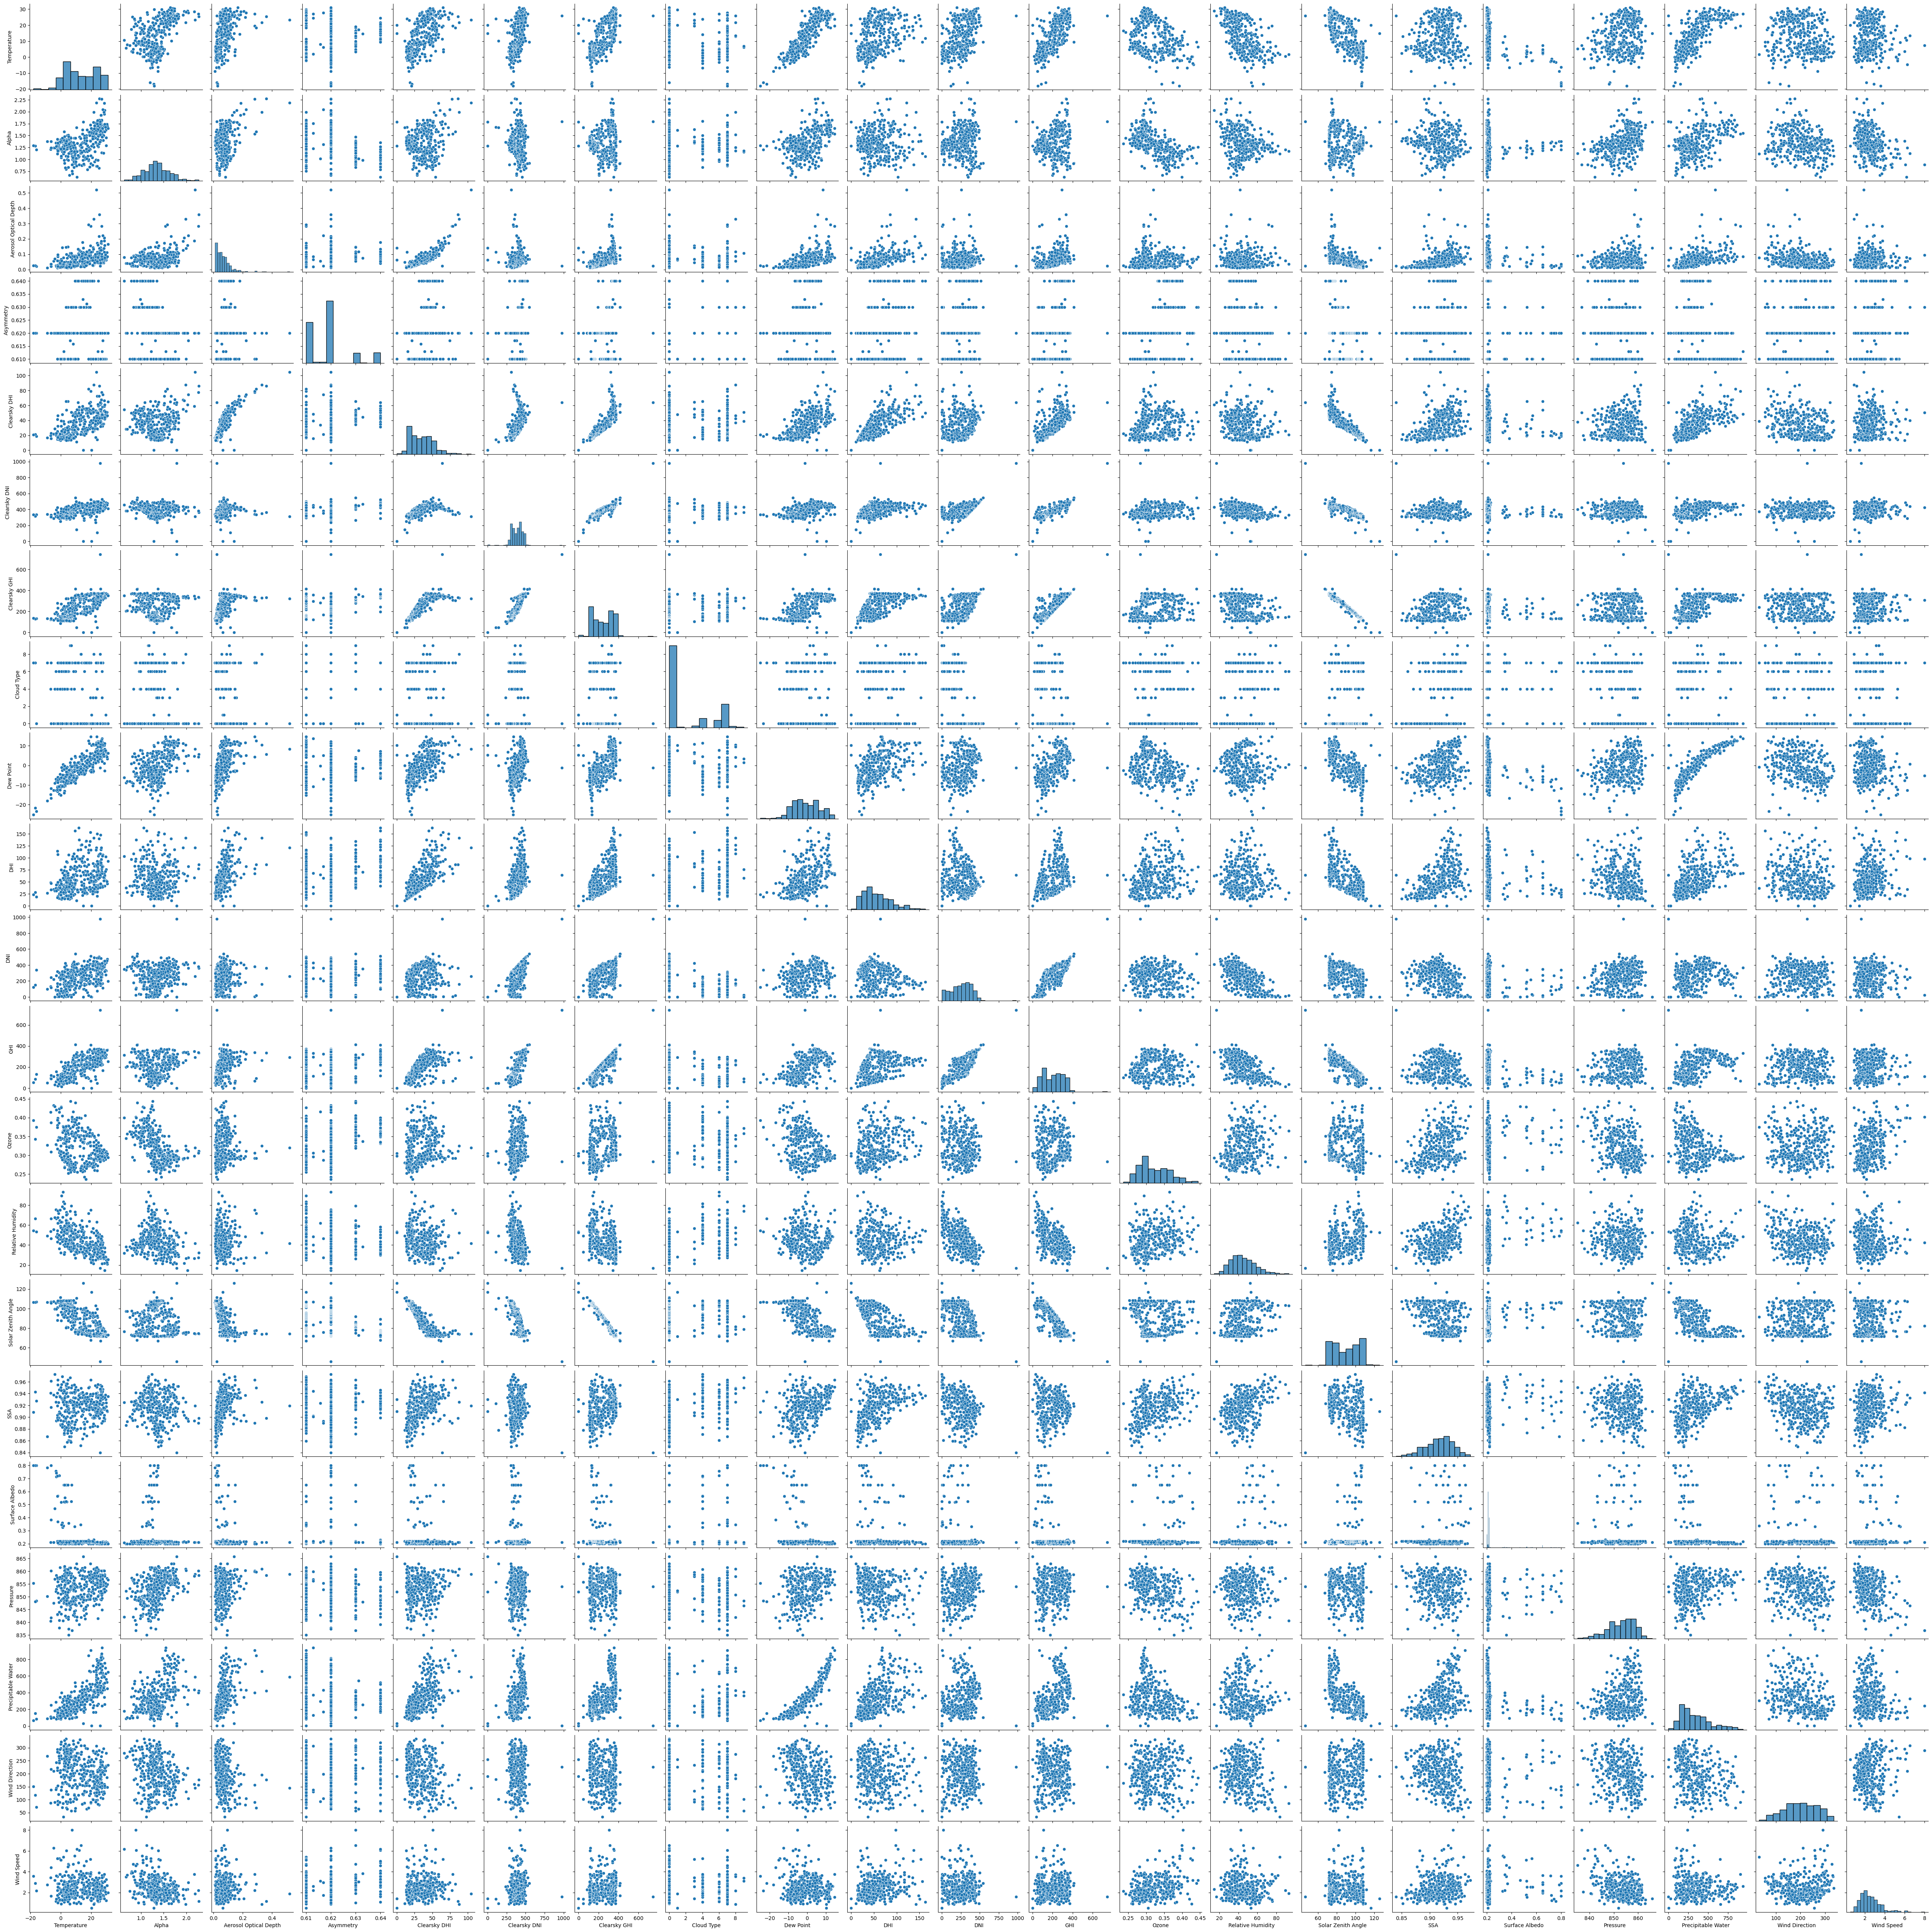

In [364]:
#Graph features against each other
sns.pairplot(Merged_Daily.iloc[:,5:])
plt.show()

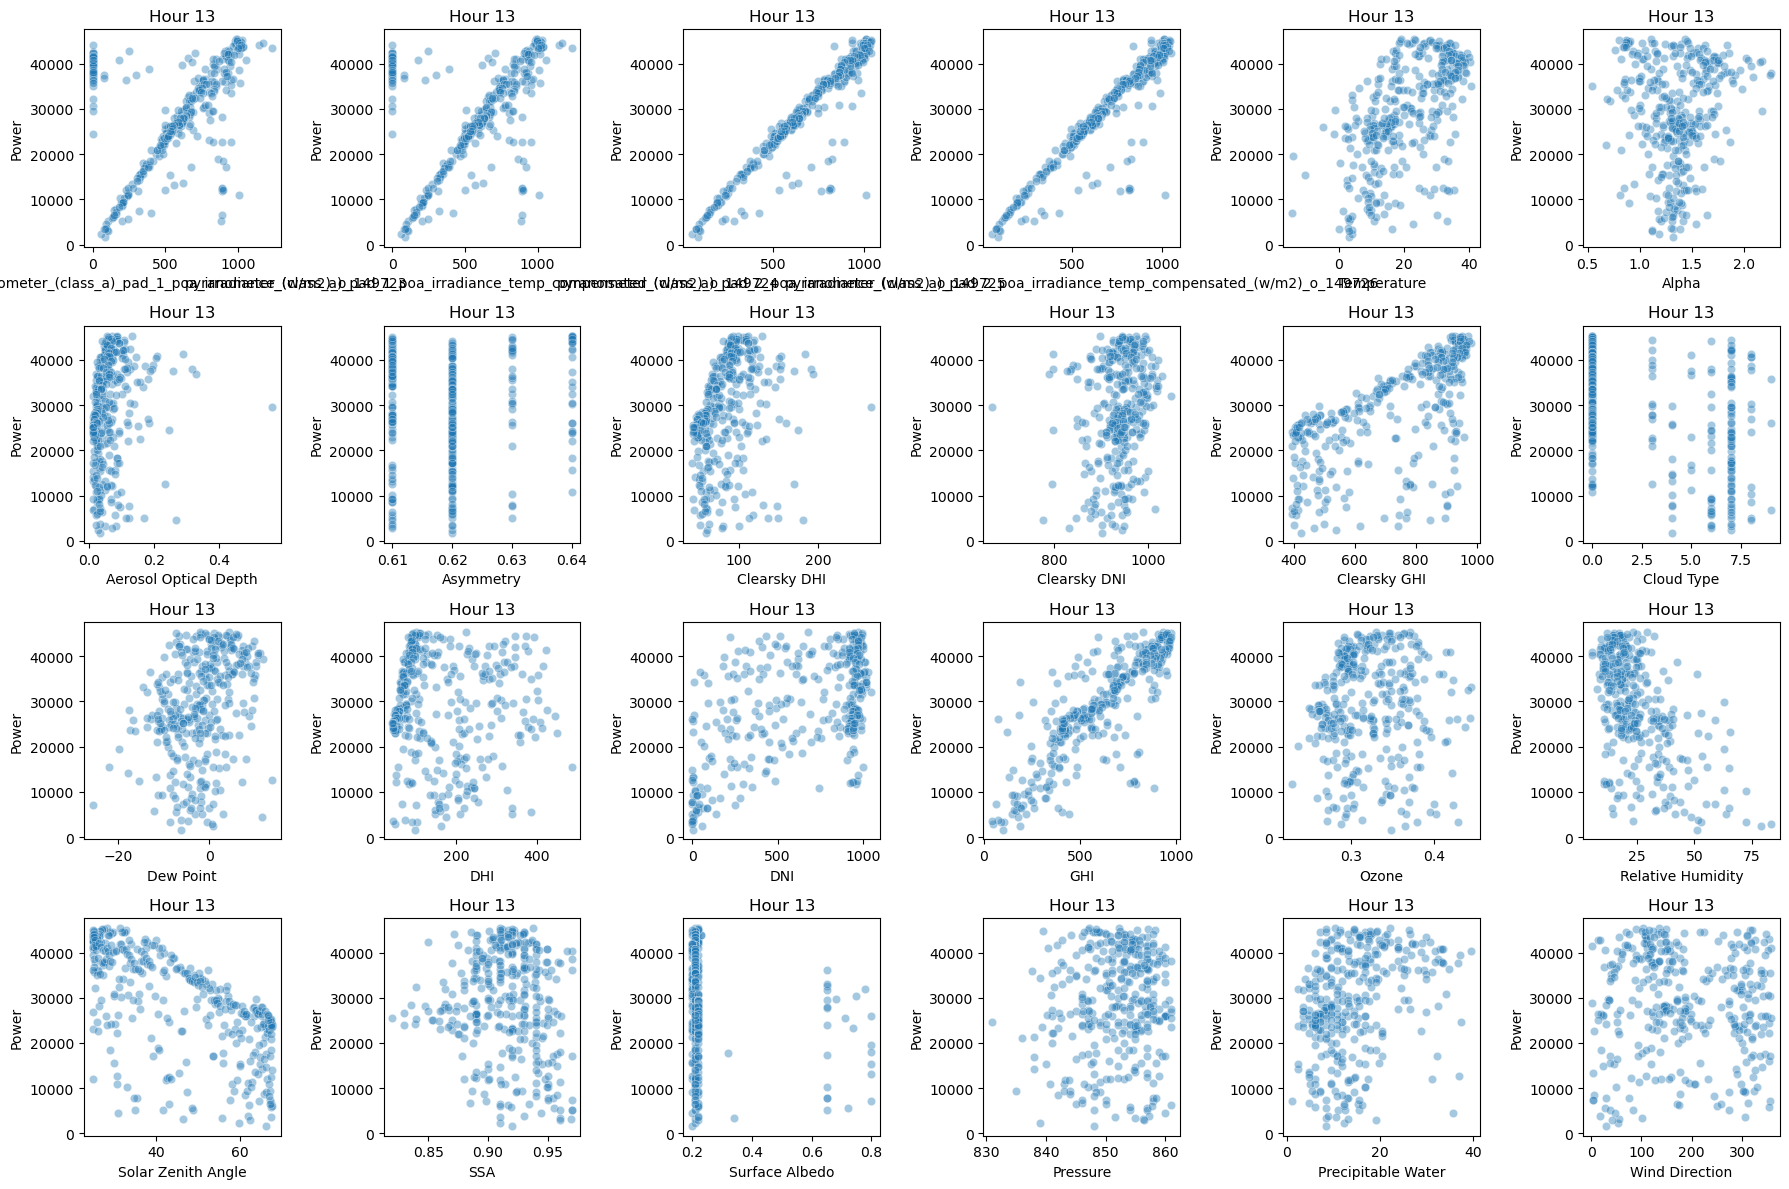

In [338]:
#Graph all data points available against power output restricted to a specific hour
hour_view = 13

features = Merged_Hourly_Power.columns[1:-1]

fig, axes = plt.subplots(4,6,figsize=(18,12))
axes = axes.flatten()
i = 0

for feature in features:
    sns.scatterplot(Merged_Hourly_Power[Merged_Hourly_Power.index.hour == hour_view],x=feature,y="Power",alpha=0.4,ax=axes[i])
    axes[i].set_title(f"Hour {hour_view}")
    i+=1
plt.tight_layout()
plt.show()

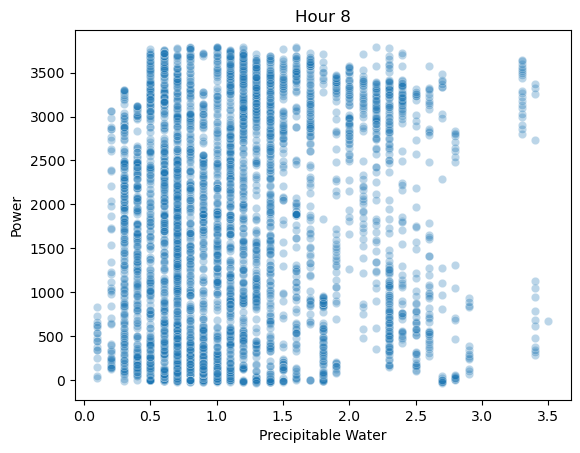

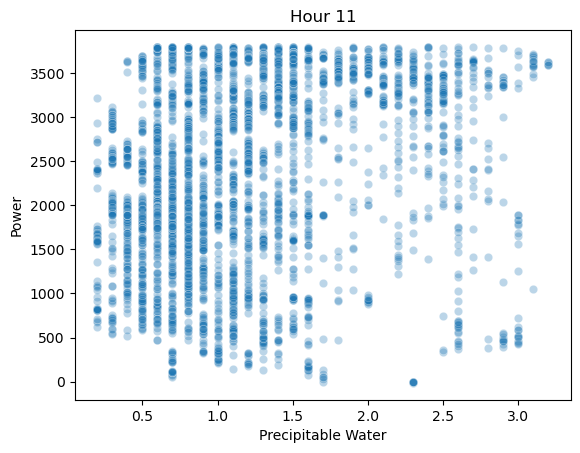

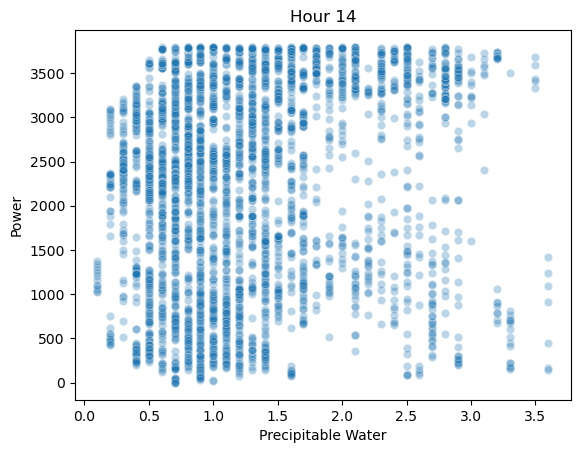

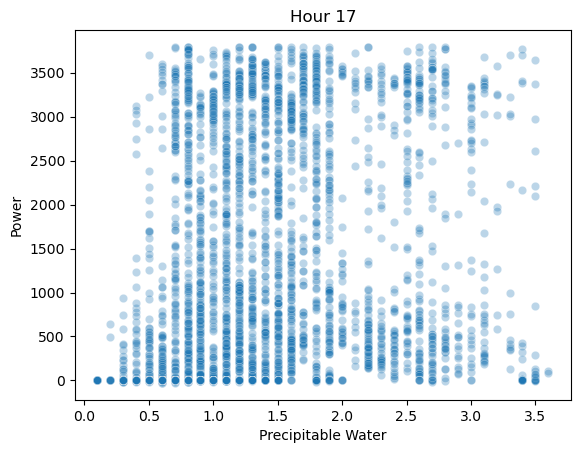

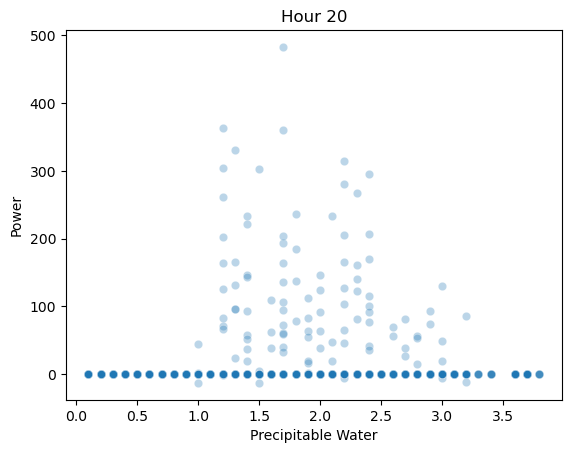

In [ ]:
#Graph against power output for chosen hours
start_hour = 8
stop_hour = 21
increment_hour = 3
weather_feather = "Precipitable Water"

for i in np.arange(start_hour,stop_hour,increment_hour):
    sns.scatterplot(Hourly_Dict[i],x=weather_feather,y="Power",alpha=0.3)
    plt.title(f"Hour {i}")
    plt.show()